## Introduction

We are performing the Exploratory Data Analysis of our adult_income.csv. We will look at each feature and do a detailed analysis on it and the importance of the feature. Our focus will be on our income feature which is categorical. We will clean the dataset, handle missing values and outliers. We will add several visualizations to best understand our data.

### Importing Libraries

In [1]:
#Importing neccessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
#Loading the dataset:
df_income = pd.read_csv("adult_income.csv")

In [3]:
df_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
#Retrieving first five rows:
df_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Retrieving the last five rows:
df_income.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#Identyfying the dimensions of the dataframe:
df_income.shape

(32561, 15)

In [7]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Dataset Features and Descriptions

1. **age**:  
   - **Type:** Integer  
   - **Description:** The age of the individual in years.

2. **workclass**:  
   - **Type:** Categorical (Object)  
   - **Description:** The classification of the individual's type of employment (e.g., Private, Self-employed, Government).

3. **fnlwgt**:  
   - **Type:** Integer  
   - **Description:** The final weight is the number of people the Census believes the entry represents.

4. **education**:  
   - **Type:** Categorical (Object)  
   - **Description:** The highest level of education achieved by the individual (e.g., Bachelors, HS-grad).

5. **education.num**:  
   - **Type:** Integer  
   - **Description:** The number of years of education completed by the individual, corresponding to the education category.

6. **marital.status**:  
   - **Type:** Categorical (Object)  
   - **Description:** The marital status of the individual (e.g., Married, Never-married, Divorced).

7. **occupation**:  
   - **Type:** Categorical (Object)  
   - **Description:** The type of occupation the individual is engaged in (e.g., Tech-support, Craft-repair, Sales).

8. **relationship**:  
   - **Type:** Categorical (Object)  
   - **Description:** The individual's relationship status within a household (e.g., Wife, Own-child, Husband).

9. **race**:  
   - **Type:** Categorical (Object)  
   - **Description:** The race of the individual (e.g., White, Black, Asian-Pac-Islander).

10. **sex**:  
    - **Type:** Categorical (Object)  
    - **Description:** The gender of the individual (Male or Female).

11. **capital.gain**:  
    - **Type:** Integer  
    - **Description:** The capital gains earned by the individual from investments or other income sources.

12. **capital.loss**:  
    - **Type:** Integer  
    - **Description:** The capital losses incurred by the individual from investments or other income sources.

13. **hours.per.week**:  
    - **Type:** Integer  
    - **Description:** The number of hours the individual works per week.

14. **native.country**:  
    - **Type:** Categorical (Object)  
    - **Description:** The country of birth for the individual.

15. **income**:  
    - **Type:** Categorical (Object)  
    - **Description:** The income bracket of the individual, typically categorized as '>50K' or '<=50K'.


### Now lets analyse our Income

In [8]:
df_income['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

**Income Categories:**
- **`<=50K`**: The individual earns less than or equal to 50k per year. (24,720 instances)
- **`>50K`**: The individual earns more than 50k per year. (7,841 instances)
- **Class Distribution:** The dataset is imbalanced, with a majority of individuals (approximately 76%) earning less than or equal to 50k, and the remaining 24% earning more than 50k

<Axes: xlabel='income', ylabel='count'>

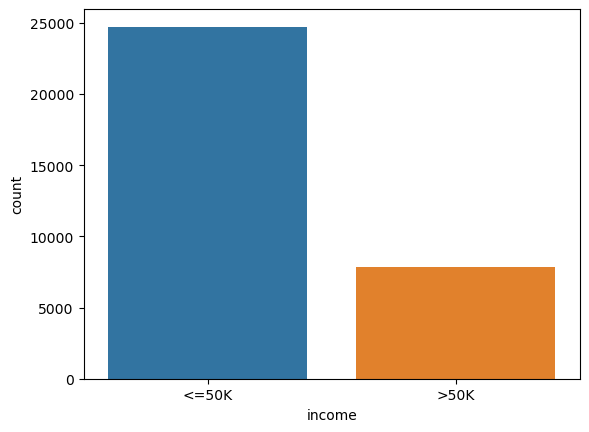

In [9]:
# Lets visualize this class imbalance
sns.countplot(data=df_income, x = 'income')

In [10]:
# Numeric columns
numeric_columns = df_income.select_dtypes(include=['number']).columns

# Categorical columns
categorical_columns = df_income.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:")
print(numeric_columns)

print("Categorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
Categorical Columns:
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


### Lets fix the column names

In [11]:
#Renaming the columns:
income_df = df_income.rename(columns={
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'native.country': 'native_country',
    'education.num': 'education_num',
    'marital.status': 'marital_status'
})

In [12]:
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Lets get the statistical Summary of our data

In [13]:
#Retrieving the statistical summary of the dataset:
income_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
income_df.apply(pd.unique)

age               [90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 3...
workclass         [?, Private, State-gov, Federal-gov, Self-emp-...
fnlwgt            [77053, 132870, 186061, 140359, 264663, 216864...
education         [HS-grad, Some-college, 7th-8th, 10th, Doctora...
education_num     [9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3,...
marital_status    [Widowed, Divorced, Separated, Never-married, ...
occupation        [?, Exec-managerial, Machine-op-inspct, Prof-s...
relationship      [Not-in-family, Unmarried, Own-child, Other-re...
race              [White, Black, Asian-Pac-Islander, Other, Amer...
sex                                                  [Female, Male]
capital_gain      [0, 99999, 41310, 34095, 27828, 25236, 25124, ...
capital_loss      [4356, 3900, 3770, 3683, 3004, 2824, 2754, 260...
hours_per_week    [40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 3...
native_country    [United-States, ?, Mexico, Greece, Vietnam, Ch...
income                                          

### Lets analyze each of our features
#### AGE

In [15]:
# Lets get the top 5 value counts
income_df['age'].value_counts()[0:5]

age
36    898
31    888
34    886
23    877
35    876
Name: count, dtype: int64

In [16]:
income_df['age'].nunique()

73

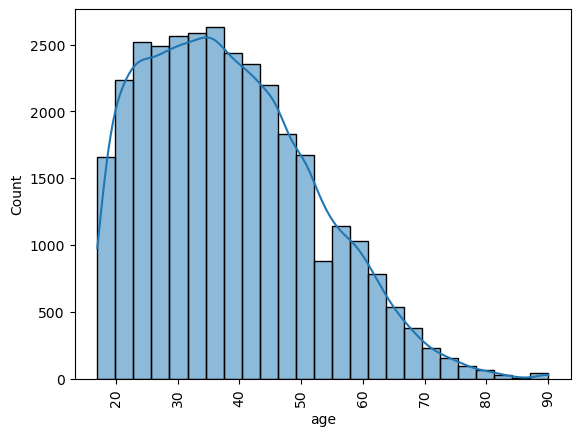

In [17]:
sns.histplot(data=income_df, x='age', bins=25, kde=True)
plt.xticks(rotation=90)
plt.show()

- There are 73 Unique Ages in our dataset in the range 17 to 90

- Majority of our records are in the range 25 - 45
- The top 5 ages are 36, 31, 24, 23, 35 in order

In [84]:
income_df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

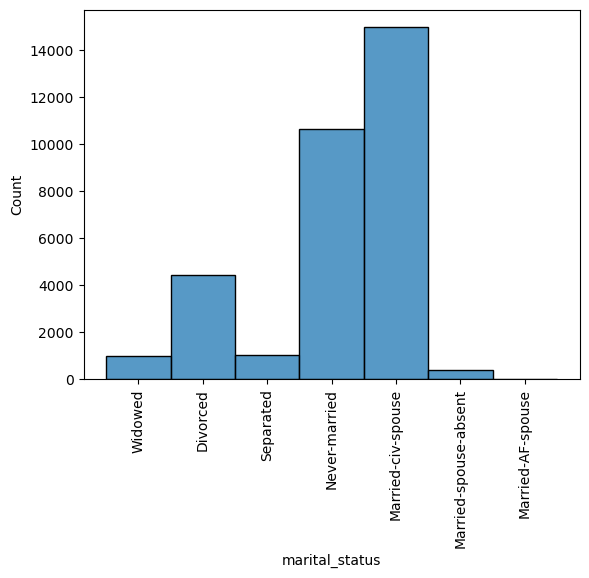

In [86]:
sns.histplot(data=income_df, x='marital_status', bins=25, kde=False)
plt.xticks(rotation=90)
plt.show()

We can observe most people are Married, but there are also a high number of Never-Married and Divorced People

#### SEX

In [18]:
income_df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

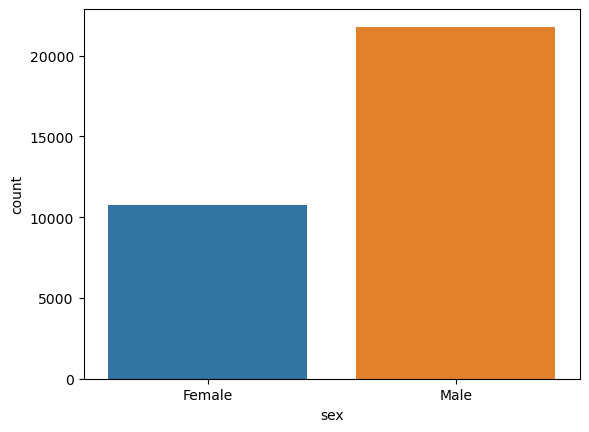

In [19]:
# Lets see a countplot of sex feature
sns.countplot(income_df, x='sex')

- There are 2 genders in our dataset - Male and Female
- Our dataset has more Male Records

#### WORKCLASS

In [20]:
income_df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

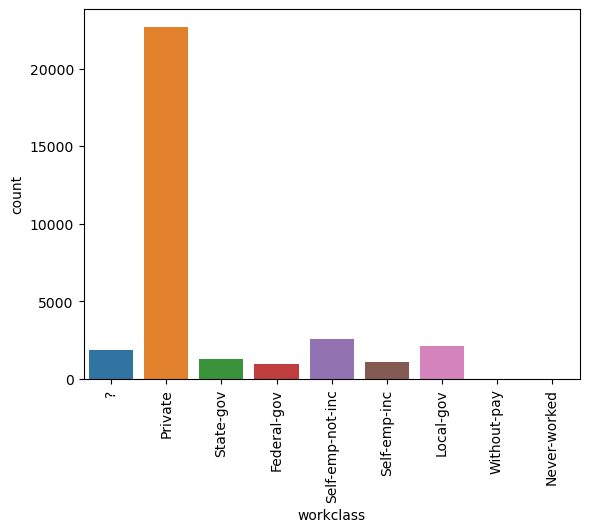

In [21]:
sns.countplot(income_df, x='workclass')
plt.xticks(rotation=90)
plt.show()

We have the following categories in workclass
- Private             
- Self-emp-not-inc    
- Local-gov           
- ?                   
- State-gov           
- Self-emp-inc        
- Federal-gov         
- Without-pay         
- Never-worked  
<br>



- '?' signifies NA, we will handle this
- Most records of workclass are in Private. Indicating most people in our dataset work in the Private Sector

#### EDUCATION

In [22]:
income_df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

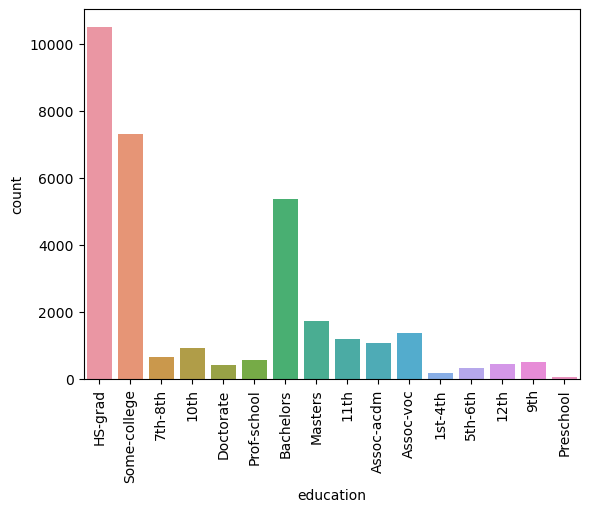

In [23]:
sns.countplot(income_df, x='education')
plt.xticks(rotation=90)
plt.show()

Most records are from HS-grad, Some-college, and Bachelors. Most people have atleast completed their education till high school

#### RELATIONSHIP

In [24]:
income_df["relationship"].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

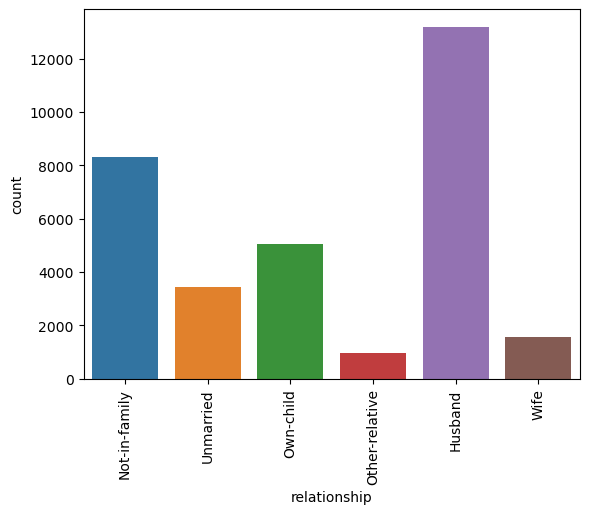

In [25]:
sns.countplot(income_df, x='relationship')
plt.xticks(rotation=90)
plt.show()

 Majority of the records are Husband

#### OCCUPATION

In [26]:
income_df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

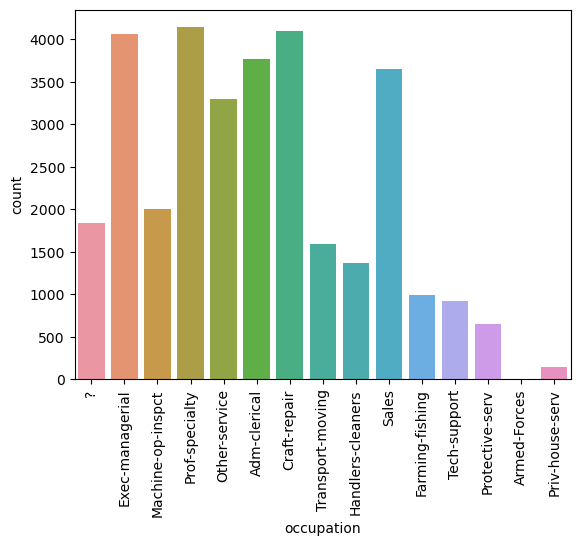

In [27]:
sns.countplot(income_df, x='occupation')
plt.xticks(rotation=90)
plt.show()

The '?' indicates NA value, we will handle this. Most of the people in our dataset work as Prof-specialty, Craft-repair, Exec Managerial, Adm-clerical, and in Sales. With the least number of people in Army

#### RACE

In [28]:
income_df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

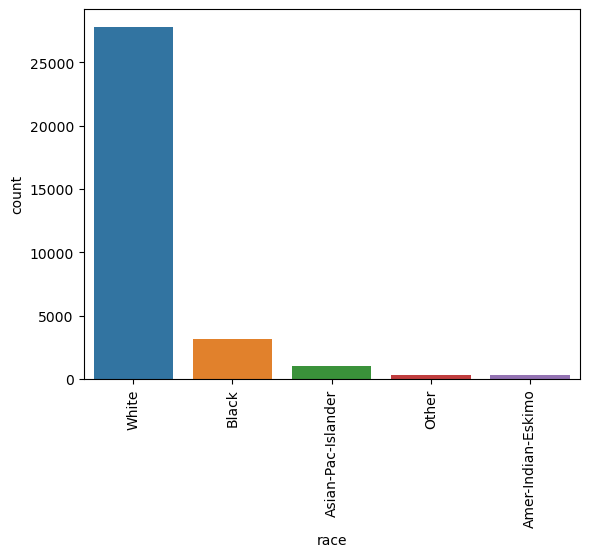

In [29]:
sns.countplot(income_df, x='race')
plt.xticks(rotation=90)
plt.show()

Majority of our data are of those who are White

#### NATIVE COUNTRY

In [30]:
income_df["native_country"].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

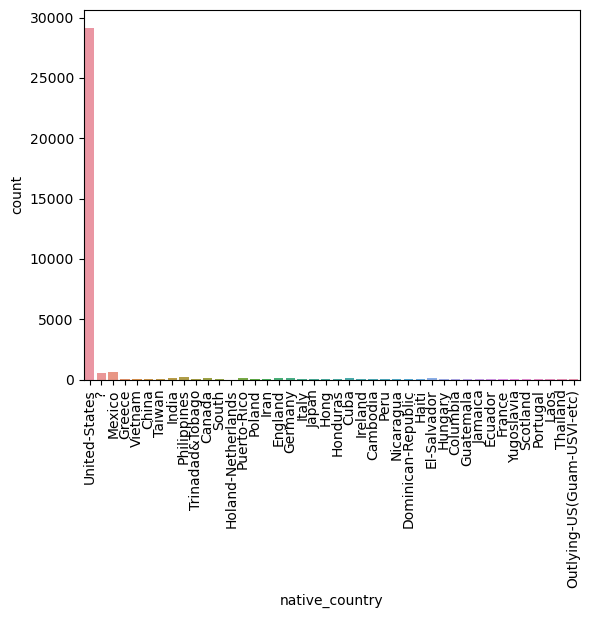

In [31]:
sns.countplot(income_df, x='native_country')
plt.xticks(rotation=90)
plt.show()

Most people are from the USA, and few number of people from Mexico, Philippines, Germany, Canada and more. We can fill the NA values (?) with USA 

#### EDUCATION NUM

In [32]:
income_df['education_num'].value_counts()

education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

- Education Num ranges from 1 to 16. 1 being the lowest education and 16 being the highest

In [33]:
# Lets find which education_num corresponds to which education
education_mapping = income_df.groupby('education')['education_num'].unique()

# Display the mapping
print(education_mapping)

education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
Name: education_num, dtype: object


As we can see our education_num ranges from 1 to 16. Where 1 corresponds to only a PreSchool Education, and 16 corresponds to a docorate

Text(0.5, 1.0, 'Distribution of Income by Education Num')

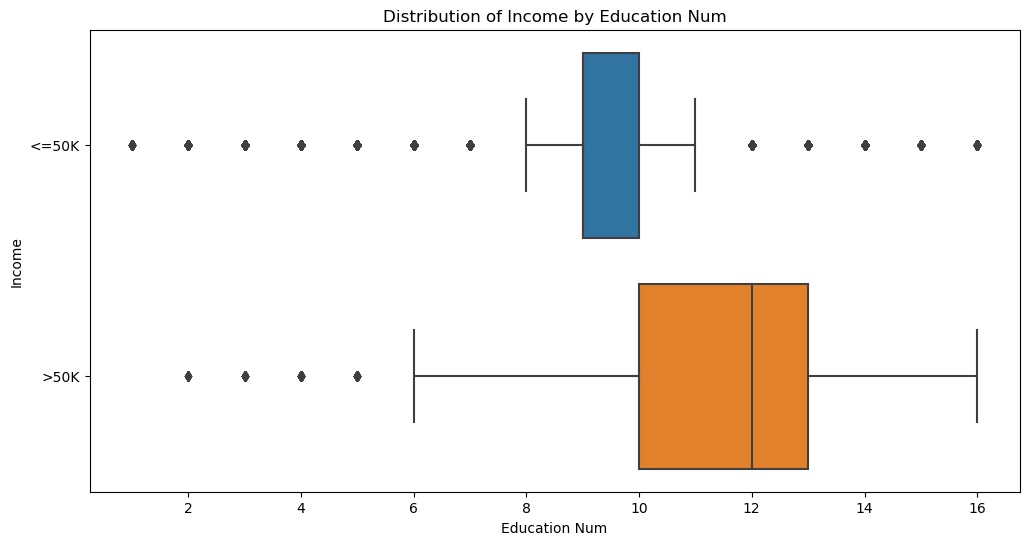

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_num', y='income', data=income_df)

# Add labels and title
plt.xlabel('Education Num')
plt.ylabel('Income')
plt.title('Distribution of Income by Education Num')

From this boxplot we can see that most people who have an income greater than 50k have an education more than 10th atleast. There are some outliers where an individual with lower education has an high income. 
- For individuals earning <=50K, the education_num values are spread across lower educational levels (ranging from Preschool [1] to Some-college [10]).
- For individuals earning >50K, the education_num values are concentrated around higher educational levels (ranging from Some-college [10] to Doctorate [16]).

- This indicates that higher education levels corresponds to higher income. This makes sense


#### HOURS PER WEEK

In [35]:
income_df['hours_per_week'].value_counts()

hours_per_week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64

In [36]:
income_df['hours_per_week'].nunique()

94

#### CAPITAL GAIN

In [37]:
income_df['capital_gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [38]:
income_df['capital_gain'].nunique()

119

#### CAPITAL LOSS

In [39]:
income_df['capital_loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0], dtype=int64)

In [40]:
income_df['capital_loss'].nunique()

92

There are 94 unique Hours Per Week and it ranges from 1 to 99 hours. **Lets view the records with 99 hours per week**

In [41]:
maxhours_week = income_df[income_df['hours_per_week'] == 99]
maxhours_week.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
92,39,Private,348521,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,99,United-States,>50K
98,39,Private,237713,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0,2415,99,United-States,>50K
409,38,Private,111499,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1977,99,United-States,>50K
484,31,Private,147284,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,99,United-States,>50K
730,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K


In [42]:
len(maxhours_week)

85

In [43]:
maxhours_week['sex'].value_counts()

sex
Male      66
Female    19
Name: count, dtype: int64

In [44]:
maxhours_week['income'].value_counts()

income
<=50K    60
>50K     25
Name: count, dtype: int64

In [45]:
maxhours_week['marital_status'].value_counts()

marital_status
Married-civ-spouse       53
Never-married            16
Divorced                 11
Widowed                   3
Separated                 1
Married-spouse-absent     1
Name: count, dtype: int64

In [46]:
maxhours_week['workclass'].value_counts()

workclass
Private             44
Self-emp-not-inc    21
Self-emp-inc         9
?                    5
Local-gov            4
State-gov            1
Federal-gov          1
Name: count, dtype: int64

What we have learnt from those who work more than 99 hours per week
- There are 85 records here
- There are 66 Males and 19 Females who work for 99 Hours per week. 
- 60 of these people earn less than 50k and 25 of them earn more than 50k
- Most of the people are married, white, and are in the Private Sector

#### Lets find the records who have only worked for 1 hour

In [47]:
minhours_week = income_df[income_df['hours_per_week'] == 1]
minhours_week.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
534,77,Self-emp-not-inc,71676,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,1944,1,United-States,<=50K
4086,69,?,320280,Some-college,10,Never-married,?,Not-in-family,White,Male,1848,0,1,United-States,<=50K
4129,66,Self-emp-inc,150726,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
4396,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
5327,69,?,195779,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K


In [48]:
len(minhours_week)

20

In [49]:
minhours_week.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,61.550000,166361.200000,9.550000,162.850000,97.200000,1.0
std,18.354621,88558.028852,2.665076,506.275489,434.691615,0.0
min,21.000000,56480.000000,5.000000,0.000000,0.000000,1.0
25%,57.750000,92138.250000,9.000000,0.000000,0.000000,1.0
50%,68.000000,149338.500000,9.000000,0.000000,0.000000,1.0
75%,74.250000,219711.000000,11.000000,0.000000,0.000000,1.0
max,81.000000,363134.000000,16.000000,1848.000000,1944.000000,1.0


In [50]:
minhours_week['income'].value_counts()

income
<=50K    18
>50K      2
Name: count, dtype: int64

In [51]:
minhours_week['sex'].value_counts()

sex
Female    10
Male      10
Name: count, dtype: int64

In [52]:
minhours_week['age'].min()

21

Those who only work for 1 hour per week
- There are 20 Records
- 2 of them have an income greater than 50k and 18 have income lower than 50k
- The records of male and female are equal
- The age of the records range from 21 to 85 

#### Lets look deeper into those who earn more than 50k and work only 1 hour

In [53]:
minhours_week[minhours_week['income'] == '>50K']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4396,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
21709,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


These two records have an income greater than 50k and only work 1 hour per week. Both records are of a married white male who is native to the USA. One of which worked in the State Goverment. Their age is around 60

#### Lets find the minimum age's in >50k and <=50k

In [54]:
income_df.groupby(['income'])['age'].min()

income
<=50K    17
>50K     19
Name: age, dtype: int64

- The youngest person who earns more than 50k is only 19 years old

In [55]:
income_df[(income_df['age'] == 19) & (income_df['income']== '>50K')]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2006,19,?,200790,12th,8,Married-civ-spouse,?,Other-relative,White,Female,15024,0,40,United-States,>50K
10961,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K


Here we can observe there are two records where the income is greater than 50k and the age is only 19 years old. 

In [58]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Handling duplicate values

In [59]:
#Checking for duplicates values:
income_df.duplicated().sum()

24

In [60]:
#Dropping the duplicate values:
income_df.drop_duplicates(inplace=True)

In [61]:
#Rechecking for duplicate values.
income_df.duplicated().sum()

0

#### Handling ? in the dataset

In [26]:
# Handling ? value in the dataset:
#First of all identify rows with ? values:
# Identify rows with '?' values
income_missing = df_income[df_income.isin(['?']).any(axis=1)]
print(income_missing)

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
9       41   Private   70037  Some-college             10       Never-married   
14      51         ?  172175     Doctorate             16       Never-married   
18      22   Private  119592    Assoc-acdm             12       Never-married   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9           Separated   
32544   72         ?  129912       HS-grad              9  Married-civ-spouse   

              occupation   

In [27]:
# Replacing '?' with NaN:
income_df.replace('?', np.nan, inplace=True)

In [28]:
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [29]:
income_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

#### Lets handle the missing data

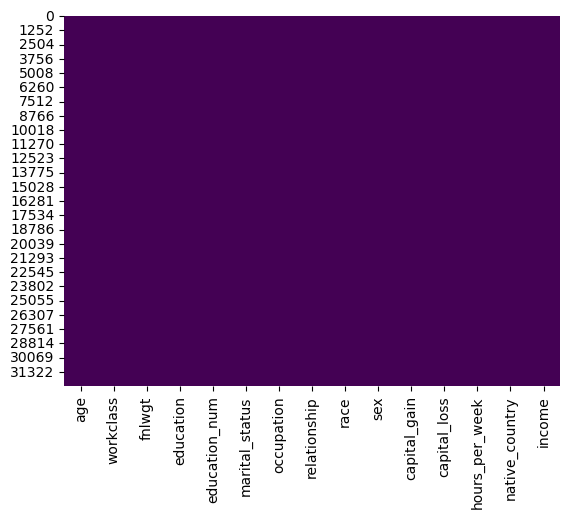

In [62]:
#Creating a heatmap to visualise and understand NaN values:
sns.heatmap(income_df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [63]:
# Fill missing categorical data with mode
income_df.fillna(income_df.mode().iloc[0], inplace=True)

In [64]:
income_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
income_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Data Visualisation

#### Correlation Heatmap

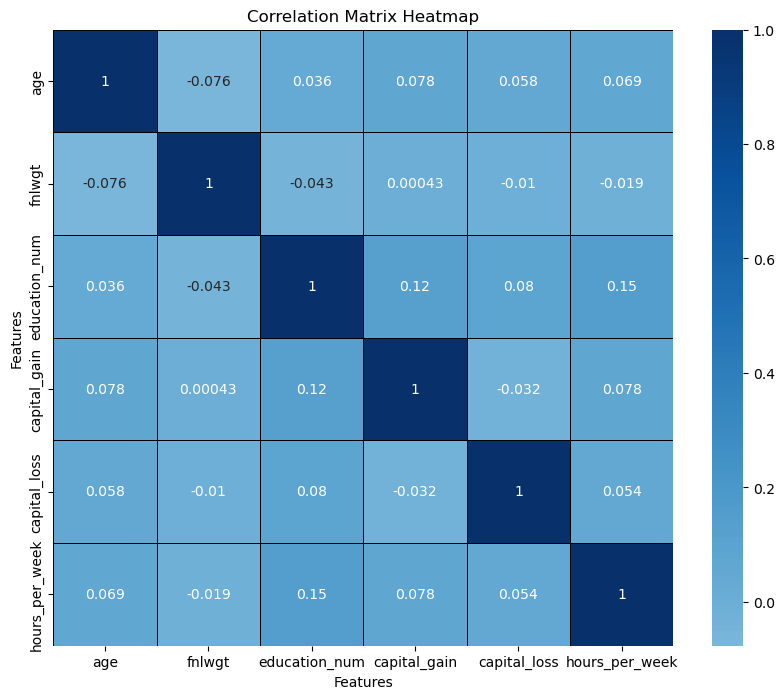

In [66]:
# Selecting the numeric columns
numeric_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Compute the correlation matrix for numeric columns
corr_matrix = income_df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, linewidths=0.5, linecolor='black')

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


There are no Features that are highle correlated

#### Count of Income for <=50k and >50k

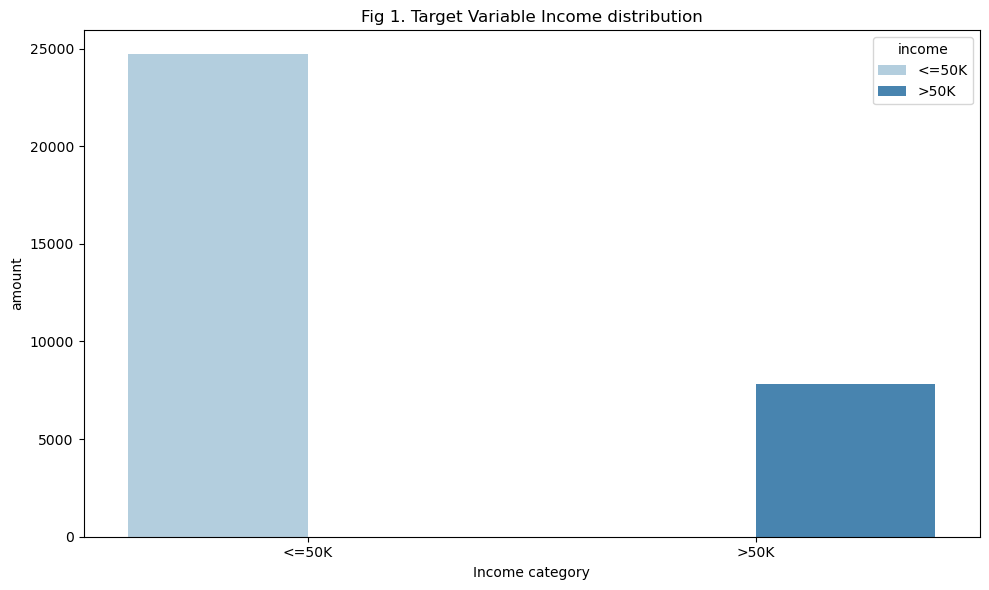

In [78]:
#show the amount of income as per category:
plt.figure(figsize=(10, 6))
#using seaborn plot:
sns.countplot(data=income_df, x='income', hue='income', palette='Blues')
plt.title('Fig 1. Target Variable Income distribution')
plt.xlabel('Income category')
plt.ylabel('amount')
plt.tight_layout()
plt.show()

In our dataset Majority of the records are for income category less than 50k

#### The count of Income by Gender

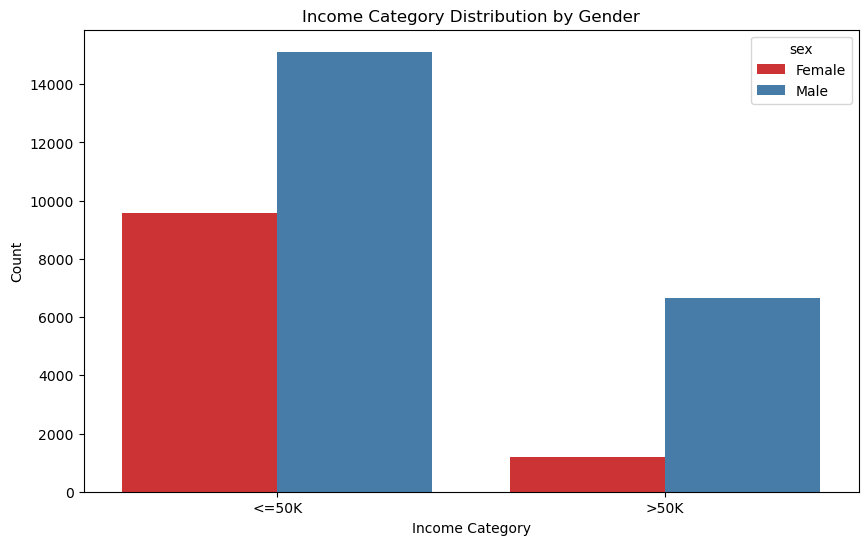

In [68]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='sex', data=income_df, palette='Set1')

# Adding titles and labels
plt.title('Income Category Distribution by Gender')
plt.xlabel('Income Category')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
The count of Male is more than the count of female, in both g

#### Lets see the Percentage Distribution of Male and Female with respect to their Income Class

In [70]:
# Calculate the percentage distribution
percentage_df = income_df.groupby(['income', 'sex']).size().reset_index(name='count')
percentage_df['percentage'] = percentage_df['count'] / percentage_df.groupby('sex')['count'].transform('sum') * 100
percentage_df

,income,sex,count,percentage
0,<=50K,Female,9583,89.044787
1,<=50K,Male,15115,69.414466
2,>50K,Female,1179,10.955213
3,>50K,Male,6660,30.585534


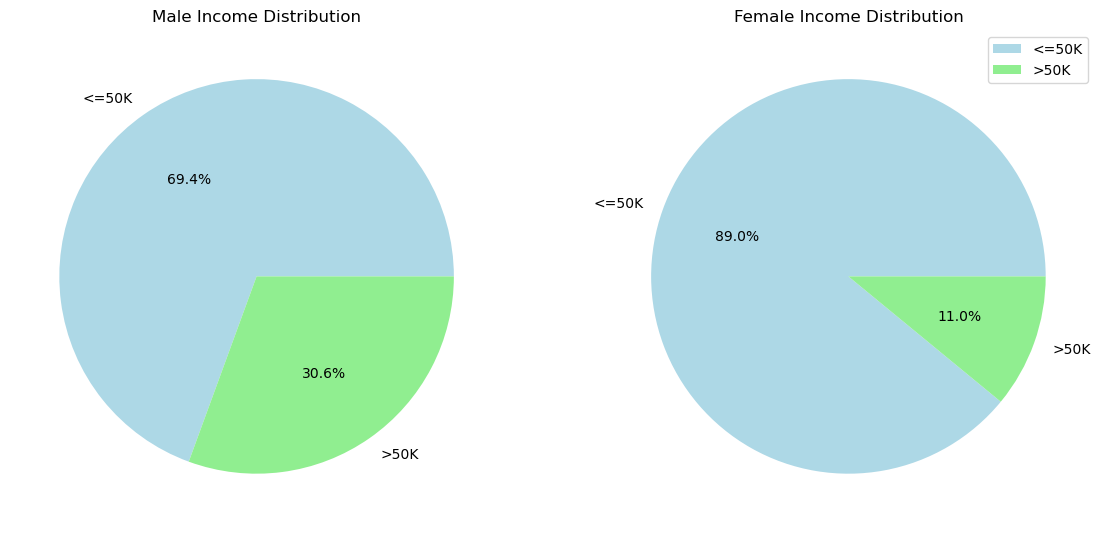

In [74]:
male_data = percentage_df[percentage_df['sex'] == 'Male']
female_data = percentage_df[percentage_df['sex'] == 'Female']


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# Male Pie Chart
axes[0].pie(male_data['percentage'], labels=male_data['income'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
axes[0].set_title('Male Income Distribution')

# Female Pie Chart
axes[1].pie(female_data['percentage'], labels=female_data['income'], autopct = '%1.1f%%', colors=['lightblue', 'lightgreen'])
axes[1].set_title("Female Income Distribution")

plt.legend()
plt.show()

In both pie charts we can see that those who earn lower than 50k are in majority. But their is a higher percentage of males who earn >50k compared to females

#### Education Level vs Income

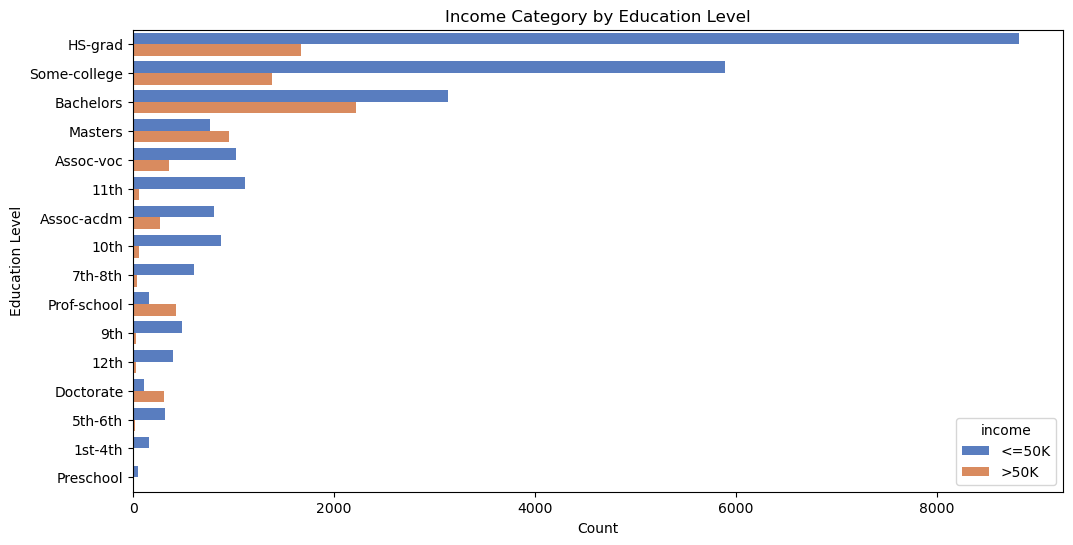

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(y='education', hue='income', data=income_df, palette='muted', order=income_df['education'].value_counts().index)
plt.title('Income Category by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

Our data has most records from HS-grad, but we can observe that with higher education like Masters, Prof School and Doctorate the count for income >50k is more. Similarly for those with lower education like Preschool, 5th-6th, 1st-4th, 7th-8th, 10th, 9th, 11th, Assoc-acdm and 12th have higher counts of income <=50k.
Thus we can observe the importance of education with respect to income

#### Workclass vs Income

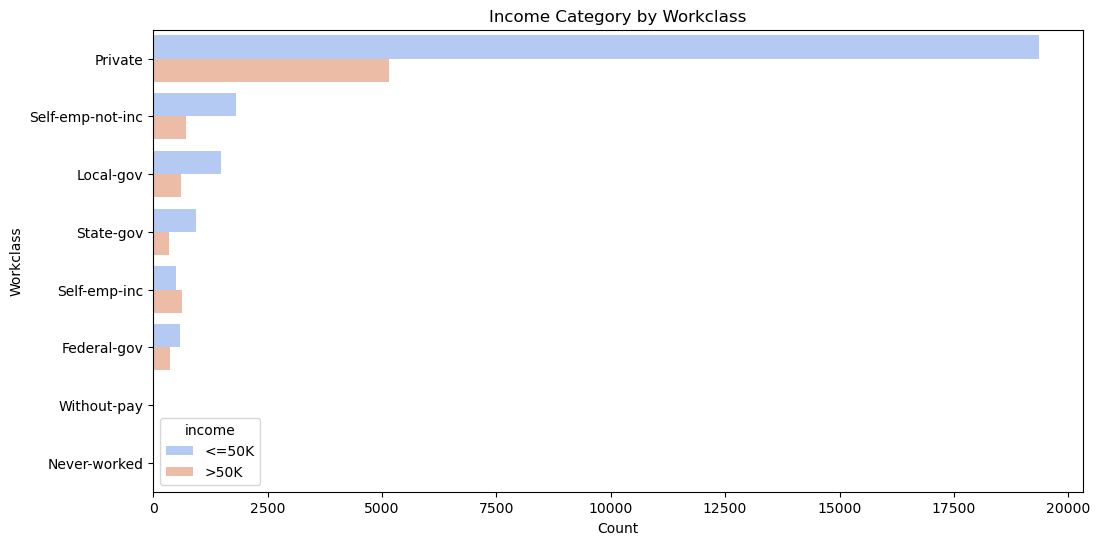

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', hue='income', data=income_df, palette='coolwarm', order=income_df['workclass'].value_counts().index)
plt.title('Income Category by Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()


Most people in our data work in the Private secor. But the count of those whose income is <=50k is lot higher. We can observe this in other workclass's also. 
Except for Self-emp inc where the count for income >50k is slightly higher

#### Boxplot of Numerical Features
- Lets observe the features with outliers in our dataset, this is done using a Boxplot

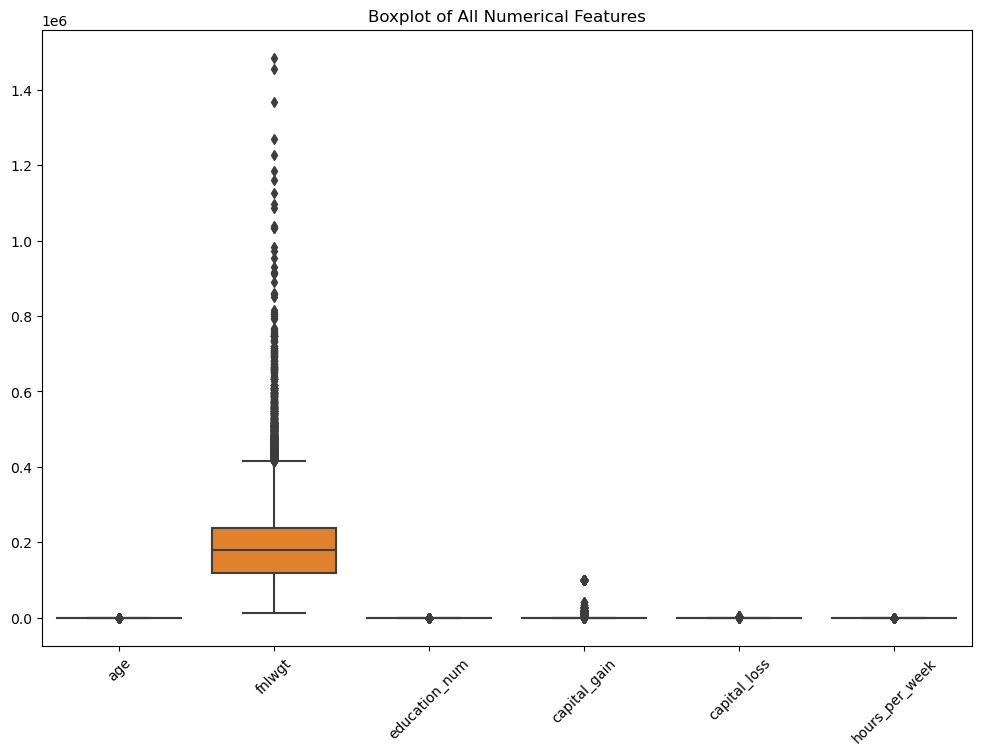

In [79]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=income_df.select_dtypes(include=['float64', 'int64']))  # Select only numerical columns
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.title('Boxplot of All Numerical Features')
plt.show()

We can observe that there are a high number of outliers in fnlgwt, lets dive deeper into this feature.
There are also some outliers in capital_gain. But we have seen that majority of our records have a very low capital gain and loss. This is why we observe some outliers here.

#### FNLWGT

In [40]:
income_df["fnlwgt"].value_counts()

fnlwgt
203488    13
164190    13
123011    13
113364    12
148995    12
          ..
137952     1
169955     1
45487      1
183522     1
257302     1
Name: count, Length: 21648, dtype: int64

<Axes: ylabel='fnlwgt'>

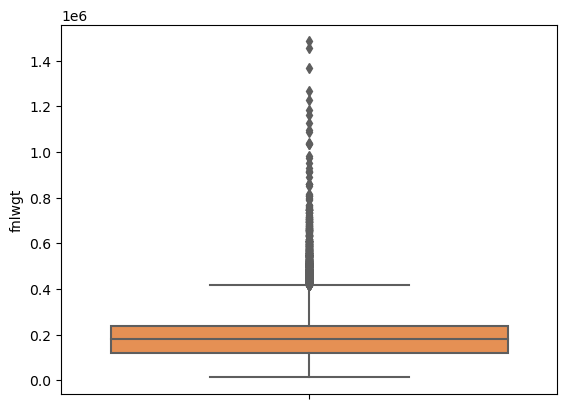

In [41]:
sns.boxplot(y=income_df["fnlwgt"], palette='Oranges')

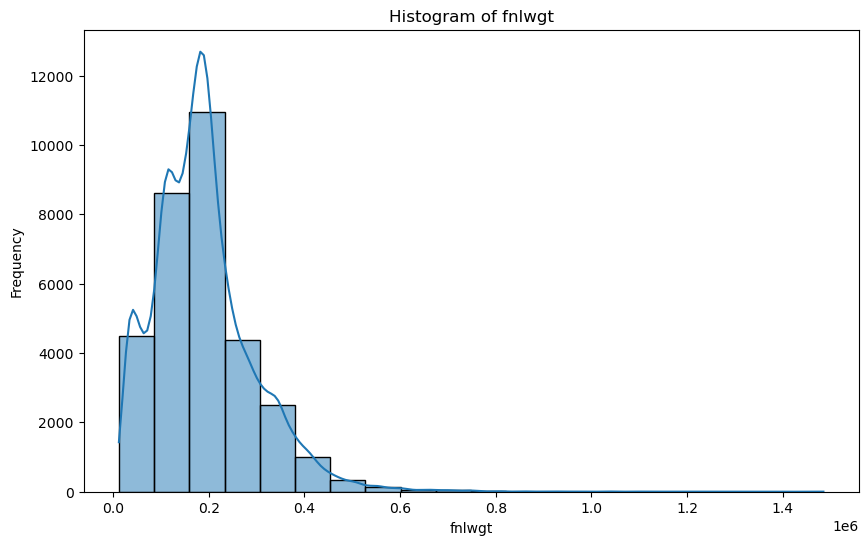

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(income_df['fnlwgt'], bins=20, kde=True)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

- The histogram is highly right skewed. Most of the values are close to the lower end particularly between 0 to 0.3
- fnlgwt has a long tail this indicates there are some values that are very high

Lets find our Lower Bound, and Upper Bound to cap our values in between them

In [80]:
Q1 = income_df['fnlwgt'].quantile(0.25)
Q3 = income_df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
income_df['fnlwgt_capped'] = income_df['fnlwgt'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


<Axes: ylabel='fnlwgt_capped'>

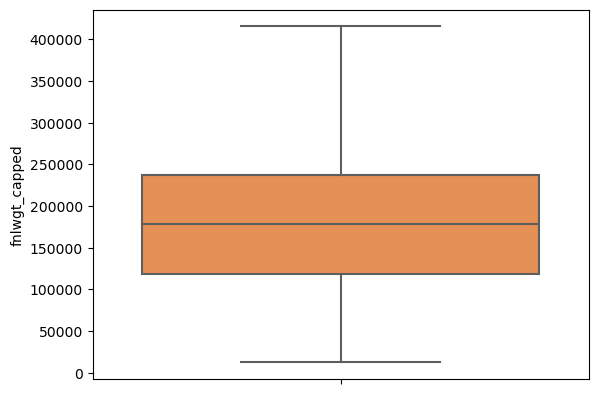

In [81]:
sns.boxplot(y=income_df["fnlwgt_capped"], palette='Oranges')

All our Outliers have been handled, now lets drop fnlgwt feature

#### Lets drop fnlgwt

In [82]:
income_df.drop(columns = ['fnlwgt'], inplace = True)

In [83]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  int64  
 1   workclass       32537 non-null  object 
 2   education       32537 non-null  object 
 3   education_num   32537 non-null  int64  
 4   marital_status  32537 non-null  object 
 5   occupation      32537 non-null  object 
 6   relationship    32537 non-null  object 
 7   race            32537 non-null  object 
 8   sex             32537 non-null  object 
 9   capital_gain    32537 non-null  int64  
 10  capital_loss    32537 non-null  int64  
 11  hours_per_week  32537 non-null  int64  
 12  native_country  32537 non-null  object 
 13  income          32537 non-null  object 
 14  fnlwgt_capped   32537 non-null  float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


#### CONCLUSION

In our analysis of the adult_income.csv dataset, we conducted a comprehensive exploration and preprocessing of the data. 
We did a detailed analysis of each feature and uncovered many observations. 
We dealt with the missing, duplicate data and also dealt with the outliers and uncovered many observations. 
We created sufficient visualizations that helped us understand the data.